In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

## 1 Numpy Arrays

In [2]:
A=np.zeros((4,3))

In [3]:
np.random.seed(20)
B=np.random.randint(20,size=(6,5))
print(B)

[[ 3 15  9 11  7]
 [ 2  0  8 19 16]
 [ 6  6 16  9  5]
 [ 7  5  2  6 13]
 [11  3 10 11 13]
 [19 14  0 10 11]]


In [8]:
C=np.sum(B,axis=0)
print(C)

[48 43 45 66 65]


In [9]:
D=B[4,:]-B[2,:]
print(D)

[ 5 -3 -6  2  8]


In [112]:
E=B[B>5]
print(B)

[[ 3 15  9 11  7]
 [ 2  0  8 19 16]
 [ 6  6 16  9  5]
 [ 7  5  2  6 13]
 [11  3 10 11 13]
 [19 14  0 10 11]]


## 2 SST

In [113]:
sst=np.load('sstsub.npy')

[[ 20.9   20.9   20.87 ...,  18.58  18.6   18.65]
 [ 20.87  20.9   20.89 ...,  18.77  18.77  18.78]
 [ 20.87  20.9   20.92 ...,  18.92  18.88  18.84]
 ..., 
 [ 19.96  19.94  19.96 ...,  15.64  15.64  15.68]
 [ 19.89  19.91  19.93 ...,  15.64  15.62  15.62]
 [ 19.8   19.85  19.86 ...,  15.64  15.59  15.56]]
(100, 100)


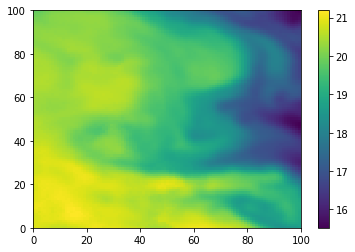

In [116]:
print(sst)
print(np.shape(sst))
plt.pcolor(sst)
plt.colorbar()

In [15]:
ny,nx=np.shape(sst)

In [16]:
lon=np.linspace(15.5,17.5,nx)
lat=np.linspace(-33,-31,ny)

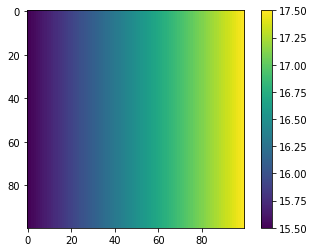

In [118]:
Lon,Lat=np.meshgrid(lon,lat)
plt.imshow(Lon)
plt.colorbar()

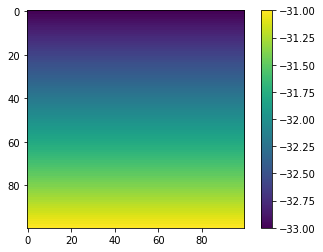

In [119]:
plt.imshow(Lat)
plt.colorbar()

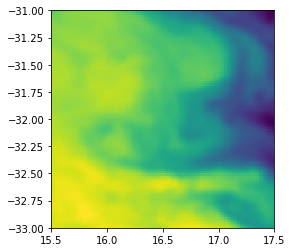

In [121]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
ax.pcolor(Lon,Lat,sst)

## Inertial Oscillation

In [123]:
t=np.arange(0,3*86400,30*60)
print(t)

[     0   1800   3600   5400   7200   9000  10800  12600  14400  16200
  18000  19800  21600  23400  25200  27000  28800  30600  32400  34200
  36000  37800  39600  41400  43200  45000  46800  48600  50400  52200
  54000  55800  57600  59400  61200  63000  64800  66600  68400  70200
  72000  73800  75600  77400  79200  81000  82800  84600  86400  88200
  90000  91800  93600  95400  97200  99000 100800 102600 104400 106200
 108000 109800 111600 113400 115200 117000 118800 120600 122400 124200
 126000 127800 129600 131400 133200 135000 136800 138600 140400 142200
 144000 145800 147600 149400 151200 153000 154800 156600 158400 160200
 162000 163800 165600 167400 169200 171000 172800 174600 176400 178200
 180000 181800 183600 185400 187200 189000 190800 192600 194400 196200
 198000 199800 201600 203400 205200 207000 208800 210600 212400 214200
 216000 217800 219600 221400 223200 225000 226800 228600 230400 232200
 234000 235800 237600 239400 241200 243000 244800 246600 248400 250200
 25200

In [29]:
u0=0.2
v0=0.3
um=0.1
vm=0.1
lamb=30
f=4*np.pi/86400*np.sin(30*np.pi/180)

In [134]:
X=u0/f*np.sin(f*t)-v0/f*np.cos(f*t)+um*t
Y=v0/f*np.sin(f*t)+v0/f*np.cos(f*t)+um*t

In [135]:
def XYT(u0,v0,um,vm,f,t):
    X=u0/f*np.sin(f*t)-v0/f*np.cos(f*t)+um*t
    Y=v0/f*np.sin(f*t)+v0/f*np.cos(f*t)+um*t
    return X,Y

In [137]:
X,Y=XYT(0.1,0.2,0.1,0.1,f,t)

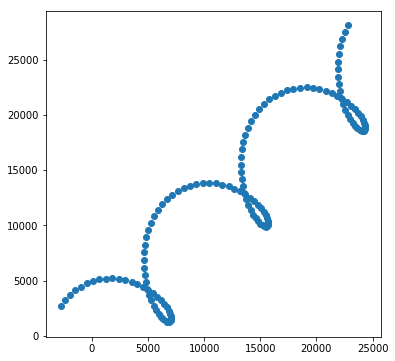

In [138]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
ax.scatter(X,Y)

## 4. Stream Line and Trajectory

In [141]:
x=np.linspace(-10,10,200)
y=np.linspace(-15,15,300)
X,Y=np.meshgrid(x,y)

In [142]:
def alpha(t):
    return 2*(1+t)/(2+t)

In [143]:
alpha(t)

1.1641238903389066

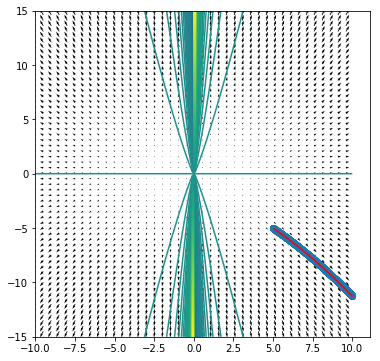

In [154]:
t=np.pi/8
U=X/(1+t)
V=2*Y/(2+t)
Psi=Y*np.sign(X)*np.abs(X)**(-alpha(t))
Psi=np.ma.masked_where(X==0,Psi)
fig,ax=plt.subplots(1,1,figsize=(6,6))
step=5
ax.contour(X,Y,Psi,300)
ax.quiver(X[::step,::step],Y[::step,::step],U[::step,::step],V[::step,::step],units='width')
ax.plot(XT,YT,'r-')
ax.scatter(XP,YP)

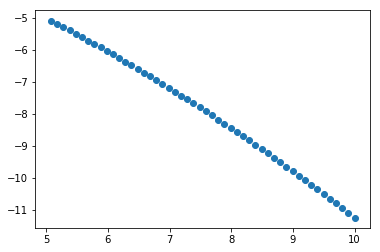

In [152]:
X0=5
Y0=-5
XT=x[x>5]
YT=Y0/4*(x[x>5]/X0+1)**2
plt.scatter(XT,YT)

In [153]:
t=np.arange(0,1,0.001)
def uvel(x,y,t):
    return x/(1+t)

def vvel(x,y,t):
    return 2*y/(2+t)

XP=np.zeros_like(t)
YP=np.zeros_like(t)
XP[0]=+5
YP[0]=-5
for it in range(1,np.size(t)):
    XP[it]=XP[it-1]+uvel(XP[it-1],YP[it-1],0.5*(t[it-1]+t[it]))*(t[it]-t[it-1])
    YP[it]=YP[it-1]+vvel(XP[it-1],YP[it-1],0.5*(t[it-1]+t[it]))*(t[it]-t[it-1])